In [1]:
import numpy as np
import pandas as pd
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

import prepare

pd.set_option('display.max_columns', None)


Bad key "text.kerning_factor" on line 4 in
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
if os.path.isfile('water_consumption.csv'):
    water = pd.read_csv('water_consumption.csv')
else:
    water = pd.read_excel('https://storage.googleapis.com/sa_saws_data_20/External%20Geekdom%20Data%20April%2021.xlsx')
    water.to_csv('water_consumption.csv', index_label='Record #')
water

,Record #,Record #.1,Prefix,Service Location,Suffix,ZIP Code,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,0,1,NaN,BUENA VISTA,ST,78207,3740.0,3740.0,3740.0,2992.0,2992.0,2992.0,3740.0,3740.0,3740.0,4489.0,2992.0,2992.0,2992.0,3740.0,2244.0,1496.0,3740.0,2992.0,2992.0,2244.0,2992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,W,TRAVIS,ST,78207,8229.0,7481.0,8229.0,8229.0,7481.0,7481.0,6733.0,7481.0,8229.0,8229.0,5985.0,28428.0,5985.0,7481.0,5985.0,5237.0,5985.0,6733.0,5237.0,6733.0,5237.0,6733.0,5985.0,7481.0,11222.0,9725.0,7481.0,6733.0,7481.0,9725.0,11222.0,9725.0,11222.0,10473.0,10473.0,10473.0
2,2,3,W,HOUSTON,ST,78207,4489.0,3740.0,3740.0,3740.0,3740.0,4489.0,5237.0,4489.0,4489.0,4489.0,4489.0,3740.0,4489.0,5237.0,4489.0,4489.0,4489.0,5237.0,5237.0,5237.0,5237.0,4489.0,4489.0,4489.0,4489.0,5237.0,4489.0,4489.0,4489.0,6733.0,4489.0,5237.0,5237.0,5985.0,4489.0,4489.0
3,3,4,W,HOUSTON,ST,78207,1496.0,2244.0,748.0,1496.0,1496.0,2992.0,6733.0,4489.0,7481.0,0.0,748.0,0.0,0.0,0.0,0.0,0.0,748.0,0.0,0.0,0.0,0.0,11222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,NaN,BUENA VISTA,ST,78207,5237.0,4489.0,3740.0,4489.0,5237.0,4489.0,3740.0,8977.0,2992.0,4489.0,3740.0,3740.0,3740.0,4489.0,4489.0,4489.0,4489.0,4489.0,5985.0,4489.0,4489.0,5985.0,5237.0,2992.0,2244.0,1496.0,748.0,1496.0,748.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706862,706862,708592,NaN,ROBBINS GROVE,NaN,78245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
706863,706863,708593,NaN,DULLES,NaN,78251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4489.0
706864,706864,708594,NaN,HEIGHTS VALLEY,NaN,78109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
706865,706865,708595,NaN,SPRING LIFE,NaN,78249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496.0


In [3]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706867 entries, 0 to 706866
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Record #          706867 non-null  int64  
 1   Record #.1        706867 non-null  int64  
 2   Prefix            44137 non-null   object 
 3   Service Location  706867 non-null  object 
 4   Suffix            321098 non-null  object 
 5   ZIP Code          706867 non-null  int64  
 6   201701            457074 non-null  float64
 7   201702            457570 non-null  float64
 8   201703            458684 non-null  float64
 9   201704            459359 non-null  float64
 10  201705            460668 non-null  float64
 11  201706            461155 non-null  float64
 12  201707            461680 non-null  float64
 13  201708            462188 non-null  float64
 14  201709            462340 non-null  float64
 15  201710            463001 non-null  float64
 16  201711            46

In [4]:
zip_code_group = water.groupby('ZIP Code').sum().drop(columns='Record #')
#zip_code_group.index = zip_code_group.index.astype('object')
zip_code_group

,Record #.1,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
ZIP Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78006,632056814,5542666.0,5083328.0,5457367.0,7077015.0,9744003.0,10671635.0,14125612.0,15671203.0,13051348.0,11123489.0,10019287.0,9592148.0,5717703.0,5286790.0,5303242.0,8513374.0,11487065.0,14128612.0,15133315.0,14197448.0,14653782.0,7537109.0,5336152.0,6075286.0,5645902.0,5422198.0,5117703.0,8567981.0,9848728.0,8990652.0,9949704.0,17394082.0,21699393.0,15455756.0,11782579.0,8029336.0
78015,2199318064,14919234.0,14335711.0,14833189.0,18038836.0,21100117.0,25634356.0,29986050.0,34265186.0,27706583.0,27821054.0,22998766.0,22361404.0,15397996.0,14508490.0,14019195.0,21756919.0,24951311.0,30073583.0,31352856.0,28810795.0,29894031.0,19588174.0,15098705.0,16054813.0,17406659.0,16220902.0,15222114.0,19692109.0,22953859.0,21955124.0,22961337.0,33936022.0,45226348.0,32781721.0,27733477.0,21420965.0
78023,3195039638,49735702.0,45751880.0,49752792.0,57977511.0,72665809.0,82477222.0,92457594.0,112469266.0,75890837.0,83511058.0,64216675.0,64536904.0,49222404.0,48329904.0,44275795.0,58713623.0,75501113.0,86913388.0,102896587.0,89420301.0,92893772.0,58665088.0,44292938.0,45873097.0,49897285.0,44710488.0,44115673.0,57059513.0,62278315.0,65574516.0,59917267.0,93846728.0,128328981.0,88951969.0,69147387.0,55104745.0
78065,211231020,3938725.0,3266173.0,3308072.0,3525021.0,4182617.0,4312035.0,4633708.0,4574620.0,4248439.0,3626018.0,3287871.0,3432257.0,3661923.0,3171917.0,3322288.0,3602836.0,4052428.0,5153645.0,4427977.0,4412272.0,4677848.0,3183873.0,3031267.0,3281885.0,3427010.0,3344717.0,3040994.0,3469655.0,3661915.0,4199823.0,4295562.0,4784080.0,4503545.0,4353174.0,3477880.0,3400835.0
78069,249457364,3123272.0,2827019.0,2776893.0,2856195.0,3692586.0,3661165.0,3692587.0,3437485.0,3602830.0,3265423.0,3008802.0,3150193.0,3257205.0,2586125.0,2896603.0,2739501.0,3061196.0,4018771.0,3685860.0,3663419.0,3636498.0,2735744.0,2529269.0,2831516.0,3083632.0,2351227.0,2639253.0,2970667.0,3194366.0,3364928.0,3314810.0,3930498.0,3626009.0,3367172.0,2954958.0,2720790.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78260,6041604328,70505674.0,65533114.0,69122279.0,84156082.0,109944951.0,109067700.0,151299106.0,147564817.0,117167449.0,109615693.0,97211415.0,84882108.0,71871182.0,63115101.0,61062632.0,91593438.0,110131533.0,139023611.0,137219413.0,131536338.0,142614683.0,69646528.0,60792279.0,64085492.0,67961145.0,61883210.0,59562474.0,86267540.0,90083150.0,96718684.0,99439068.0,149017639.0,194572130.0,129075293.0,92350004.0,74346381.0
78261,4940581250,43109693.0,40637166.0,42672794.0,52643575.0,62469979.0,67165838.0,85897499.0,80216467.0,71187657.0,61762977.0,58737619.0,52721379.0,43734358.0,38254309.0,40650791.0,55824474.0,66459590.0,86712219.0,79314977.0,78173333.0,80606946.0,44818291.0,38415927.0,42407170.0,41978507.0,40905729.0,38628370.0,54163694.0,56518772.0,62293361.0,59980904.0,97331434.0,107739853.0,88739509.0,58896893.0,51062742.0
78263,193088866,3040246.0,2820282.0,3011066.0,3079130.0,4191573.0,4790823.0,5574841.0,5242672.0,4380109.0,3926003.0,3408315.0,3141978.0,3617033.0,2504570.0,2996845.0,3120287.0,3797325.0,6141143.0,4834197.0,5802246.0,5081085.0,3099330.0,2603309.0,2936982.0,3013295.0,2812050.0,2673647.0,3062678.0,3110558.0,3860155.0,3828730.0,6168066.0,6373036.0,4916506.0,2973649.0,3115053.0


In [5]:
sso = pd.read_csv('SSO_with_zip_codes.csv')
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code
0,6582,2019-03-10 00:00:00,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,3,2019,11,0.0,8.0,16.550000,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaN,27.0,2019-03-10 13:43:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746
1,6583,2019-03-10 00:00:00,6804,S FLORES ST,80,0.0,2019-03-10 14:25:00,2019-03-10 15:45:00,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,24250,24193,STORMDRAIN,None,3.0,3,2019,11,0.0,8.0,157.000000,PVC,1988.0,NaN,NaN,6804 S FLORES,1,1.0,0,GRAVITY,Sewer Main,NaN,65.0,2019-03-10 15:30:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","6804 S FLORES,SAN ANTONIO,Texas,USA","Flores, West Odessa, Ector County, Texas, Unit...",Texas
2,6581,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.000000,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216
3,6584,2019-03-09 00:00:00,3602,SE MILITARY DR,83,0.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,NaN,SALADO CREEK,92804,92805,EASEMENT,None,3.0,3,2019,10,0.0,8.0,213.910000,PVC,1983.0,NaN,NaN,3602 SE MILITARY DR,1,1.0,0,GRAVITY,Sewer Main,NaN,33.0,2019-03-09 16:10:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3602 SE MILITARY DR,SAN ANTONIO,Texas,USA","Quality Suites, Southeast Military Drive, Hill...",78223
4,6580,2019-03-06 00:00:00,100,PANSY LN,75,0.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,61141,49543,STREET,None,2.0,3,2019,10,0.0,12.0,291.900000,CP,1952.0,NaN,NaN,100 PANSY LN,2,2.0,2018-12-15 00:00:00,GRAVITY,Sewer Main,NaN,0.0,2019-03-06 09:40:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","100 PANSY LN,SAN ANTONIO,Texas,USA","Pansy Lane, San Antonio, Bexar County, Texas, ...",78209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,371,2009-01-06 00:00:00,2383,LOOP 410 NE,2000,NaN,2009-01-06 12:00:00,2009-01-06 13:00:00,1.000000,Debris/Rock,CLEANED MAIN,APPLIED HTH,SALADO CREEK,46343,59920,DRAINAGE CULVERT,NaN,10.0,1,2009,2,NaN,8.0,400.000000,VCP,1966.0,NaN,NaN,NE LOOP 410 02383,1,0.0,0,GRAVITY,Sewer Main,NaN,NaN,NaN,False,structural,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","NE LOOP 410 02383,SAN ANTONIO,Texas,USA","Northeast Loop 410, San Antonio, Bexar County,...",78220-1930
3179,372,2009-01-05 00:00:00,7407,ELDERBERRY,800,NaN,2009-01-05 14:00:00,2009-01-05 16:00:00,2.000000,Rags,CLEANED MAIN,APPLIED HTH,LEON CREEK,89038,74015,STREET,NaN,7.0,1,2009,2,NaN,8.0,151.877494,VCP,1976.0,NaN,NaN,ELDERBERRY 07407,2,0.0,0,GRAVITY,Sewer Main,NaN,NaN,NaN,False,structural,0.00,0.0,0.0,0.0,NaN,"(250, 1000]","ELDERBERRY 07407,SAN ANTONIO,Texas,USA","Elderberry, Camp Willow, Guadalupe County, Tex...

In [6]:
#sso.merge(zip_code_group, left_on='zip_code', right_index=True)
sso.zip_code = sso.zip_code.str.strip()

In [7]:
sso = sso[sso.zip_code.str.isnumeric()]
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code
0,6582,2019-03-10 00:00:00,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,3,2019,11,0.0,8.0,16.550000,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaN,27.0,2019-03-10 13:43:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746
2,6581,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.000000,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216
3,6584,2019-03-09 00:00:00,3602,SE MILITARY DR,83,0.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,NaN,SALADO CREEK,92804,92805,EASEMENT,None,3.0,3,2019,10,0.0,8.0,213.910000,PVC,1983.0,NaN,NaN,3602 SE MILITARY DR,1,1.0,0,GRAVITY,Sewer Main,NaN,33.0,2019-03-09 16:10:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3602 SE MILITARY DR,SAN ANTONIO,Texas,USA","Quality Suites, Southeast Military Drive, Hill...",78223
4,6580,2019-03-06 00:00:00,100,PANSY LN,75,0.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,61141,49543,STREET,None,2.0,3,2019,10,0.0,12.0,291.900000,CP,1952.0,NaN,NaN,100 PANSY LN,2,2.0,2018-12-15 00:00:00,GRAVITY,Sewer Main,NaN,0.0,2019-03-06 09:40:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","100 PANSY LN,SAN ANTONIO,Texas,USA","Pansy Lane, San Antonio, Bexar County, Texas, ...",78209
5,6579,2019-03-05 00:00:00,3200,S HACKBERRY ST,250,0.0,2019-03-05 14:22:00,2019-03-05 14:32:00,0.166667,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,38907,26117,STREET,None,3.0,3,2019,10,0.0,8.0,315.000000,RL,1992.0,NaN,NaN,3200 S Hackberry St,2,2.0,2017-04-11 00:00:00,GRAVITY,Sewer Main,NaN,0.0,2019-03-05 14:22:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3200 S Hackberry St,SAN ANTONIO,Texas,USA","3200, South Hackberry Street, Denver Heights, ...",78210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,222,2009-01-13 00:00:00,2802,LASSES,50,NaN,2009-01-13 13:00:00,2009-01-13 13:30:00,0.500000,Debris/Rock,CLEANED MAIN,APPLIED HTH,DOS RIOS,28035,42492,STORMDRAIN,NaN,3.0,1,2009,3,NaN,8.0,285.000000,VCP,1956.0,NaN,NaN,LASSES 02802,1,0.0,0,GRAVITY,Sewer Main,NaN,NaN,NaN,False,structural,0.00,0.0,0.0,0.0,NaN,"(15, 50]","LASSES 02802,SAN ANTONIO,Texas,USA","Lasses Boulevard, San Antonio, Bexar County, T...",78223
3171,364,2009-01-08 00:00:00,3710,NEER AVE,3000,NaN,2009-01-08 08:30:00,2009-01-08 10:30:00,2.000000,Grease,CLEANED MAIN,APPLIED HTH,DOS RIOS,3070,2386,GROUND,NaN,1.0,1,2009,2,NaN,8.0,189.000000,CT,1950.0,NaN,NaN,NEER AVE 03710,5,0.0,0,GRAVITY,Sewer Main,NaN,NaN,NaN,False,structural,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","NEER AVE 03710,SAN ANTONIO,Texas,USA","Neer Avenue, Keystone Park, San Antonio, Bexar...",78201
31

In [8]:
sso.zip_code = sso.zip_code.astype('int')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code
0,6582,2019-03-10 00:00:00,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,3,2019,11,0.0,8.0,16.550000,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaN,27.0,2019-03-10 13:43:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746
2,6581,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.000000,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216
3,6584,2019-03-09 00:00:00,3602,SE MILITARY DR,83,0.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,NaN,SALADO CREEK,92804,92805,EASEMENT,None,3.0,3,2019,10,0.0,8.0,213.910000,PVC,1983.0,NaN,NaN,3602 SE MILITARY DR,1,1.0,0,GRAVITY,Sewer Main,NaN,33.0,2019-03-09 16:10:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3602 SE MILITARY DR,SAN ANTONIO,Texas,USA","Quality Suites, Southeast Military Drive, Hill...",78223
4,6580,2019-03-06 00:00:00,100,PANSY LN,75,0.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,61141,49543,STREET,None,2.0,3,2019,10,0.0,12.0,291.900000,CP,1952.0,NaN,NaN,100 PANSY LN,2,2.0,2018-12-15 00:00:00,GRAVITY,Sewer Main,NaN,0.0,2019-03-06 09:40:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","100 PANSY LN,SAN ANTONIO,Texas,USA","Pansy Lane, San Antonio, Bexar County, Texas, ...",78209
5,6579,2019-03-05 00:00:00,3200,S HACKBERRY ST,250,0.0,2019-03-05 14:22:00,2019-03-05 14:32:00,0.166667,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,38907,26117,STREET,None,3.0,3,2019,10,0.0,8.0,315.000000,RL,1992.0,NaN,NaN,3200 S Hackberry St,2,2.0,2017-04-11 00:00:00,GRAVITY,Sewer Main,NaN,0.0,2019-03-05 14:22:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3200 S Hackberry St,SAN ANTONIO,Texas,USA","3200, South Hackberry Street, Denver Heights, ...",78210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,222,2009-01-13 00:00:00,2802,LASSES,50,NaN,2009-01-13 13:00:00,2009-01-13 13:30:00,0.500000,Debris/Rock,CLEANED MAIN,APPLIED HTH,DOS RIOS,28035,42492,STORMDRAIN,NaN,3.0,1,2009,3,NaN,8.0,285.000000,VCP,1956.0,NaN,NaN,LASSES 02802,1,0.0,0,GRAVITY,Sewer Main,NaN,NaN,NaN,False,structural,0.00,0.0,0.0,0.0,NaN,"(15, 50]","LASSES 02802,SAN ANTONIO,Texas,USA","Lasses Boulevard, San Antonio, Bexar County, T...",78223
3171,364,2009-01-08 00:00:00,3710,NEER AVE,3000,NaN,2009-01-08 08:30:00,2009-01-08 10:30:00,2.000000,Grease,CLEANED MAIN,APPLIED HTH,DOS RIOS,3070,2386,GROUND,NaN,1.0,1,2009,2,NaN,8.0,189.000000,CT,1950.0,NaN,NaN,NEER AVE 03710,5,0.0,0,GRAVITY,Sewer Main,NaN,NaN,NaN,False,structural,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","NEER AVE 03710,SAN ANTONIO,Texas,USA","Neer Avenue, Keystone Park, San Antonio, Bexar...",78201
31

In [10]:
sso = sso.merge(zip_code_group, left_on='zip_code', right_on='ZIP Code')
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,Record #.1,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,6581,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.00,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864722.0,52531225.0,75968557.0,87355483.0,58041793.0,57117878.0,50194817.0,50509143.0,38269971.0,39781942.0,34459079.0,42997272.0,51640964.0,72397148.0,75373164.0,62155628.0,77189539.0,37351993.0,33603946.0,35840872.0,37159047.0,32604489.0,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
1,6452,2018-09-16 00:00:00,12251,FARVIEW LN,138900,0.0,2018-09-16 16:40:00,2018-09-17 03:00:00,10.333333,I/I,NaN,DILUTED BY HEAVY RAIN WATER,SALADO CREEK,53128,52815,Spilled Into SALADO CREEK BED,SALADO CREEK,9.0,9,2018,38,0.0,27.0,587.00,RCP,1976.0,0.75,2.51,FARVIEW LN 12251,5,1.0,0,OUTFALL,Sewer Main,NaN,0.0,2018-09-16 16:40:00,True,rain event,0.00,0.0,0.0,0.0,NaN,"(50000, 2000000]","FARVIEW LN 12251,SAN ANTONIO,Texas,USA","12251, Farview Lane, San Antonio, Bexar County...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864722.0,52531225.0,75968557.0,87355483.0,58041793.0,57117878.0,50194817.0,50509143.0,38269971.0,39781942.0,34459079.0,42997272.0,51640964.0,72397148.0,75373164.0,62155628.0,77189539.0,37351993.0,33603946.0,35840872.0,37159047.0,32604489.0,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
2,6426,2018-09-04 00:00:00,12251,FARVIEW LN,81600,NaN,2018-09-04 08:09:00,2018-09-04 21:45:00,13.600000,I/I,NaN,DILUTED BY HEAVY RAIN WATER,SALADO CREEK,929473,53128,CREEK BED - Spilled Into Salado Creek,SALADO CREEK,9.0,9,2018,36,0.0,8.0,68.00,PVC,1999.0,0.82,6.07,FARVIEW LN 12251,2,1.0,0,GRAVITY,Sewer Main,NaN,0.0,2018-09-04 08:09:00,True,rain event,0.00,0.0,0.0,0.0,NaN,"(50000, 2000000]","FARVIEW LN 12251,SAN ANTONIO,Texas,USA","12251, Farview Lane, San Antonio, Bexar County...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864722.0,52531225.0,75968557.0,87355483.0,58041793.0,57117878.0,50194817.0,50509143.0,38269971.0,39781942.0,34459079.0,42997272.0,51640964.0,72397148.0,75373164.0,62155628.0,77189539.0,37351993.0,33603946.0,35840872.0,37159047.0,32604489.0,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
3,6391,2018-07-09 00:00:00,103,MORGANS CIR,2750,0.0,2018-07-09 16:50:00,2018-07-09 17:45:00,0.916667,I/I,NaN,Diluted by Heavy Rain Water,SALADO CREEK,931145,931131,CREEK BED - Spilled Into Salado Creek - Over t...,SALADO CREEK,9.0,7,2018,28,0.0,27.0,69.38,PVC,2016.0,2.54,1.32,MORGANS CIR 103,1,1.0,0,OUTFALL,Sewer Main,NaN,0.0,2018-07-09 16:50:00,False,rain event,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","MORGANS CIR 103,SAN ANTONIO,Texas,USA","103, Morgans Circle, San Antonio, Bexar County...",78216,2931501977,40167242.0,37

In [11]:
sso.report_date = pd.to_datetime(sso.report_date)
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,Record #.1,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,6581,2019-03-09,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.00,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864722.0,52531225.0,75968557.0,87355483.0,58041793.0,57117878.0,50194817.0,50509143.0,38269971.0,39781942.0,34459079.0,42997272.0,51640964.0,72397148.0,75373164.0,62155628.0,77189539.0,37351993.0,33603946.0,35840872.0,37159047.0,32604489.0,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
1,6452,2018-09-16,12251,FARVIEW LN,138900,0.0,2018-09-16 16:40:00,2018-09-17 03:00:00,10.333333,I/I,NaN,DILUTED BY HEAVY RAIN WATER,SALADO CREEK,53128,52815,Spilled Into SALADO CREEK BED,SALADO CREEK,9.0,9,2018,38,0.0,27.0,587.00,RCP,1976.0,0.75,2.51,FARVIEW LN 12251,5,1.0,0,OUTFALL,Sewer Main,NaN,0.0,2018-09-16 16:40:00,True,rain event,0.00,0.0,0.0,0.0,NaN,"(50000, 2000000]","FARVIEW LN 12251,SAN ANTONIO,Texas,USA","12251, Farview Lane, San Antonio, Bexar County...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864722.0,52531225.0,75968557.0,87355483.0,58041793.0,57117878.0,50194817.0,50509143.0,38269971.0,39781942.0,34459079.0,42997272.0,51640964.0,72397148.0,75373164.0,62155628.0,77189539.0,37351993.0,33603946.0,35840872.0,37159047.0,32604489.0,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
2,6426,2018-09-04,12251,FARVIEW LN,81600,NaN,2018-09-04 08:09:00,2018-09-04 21:45:00,13.600000,I/I,NaN,DILUTED BY HEAVY RAIN WATER,SALADO CREEK,929473,53128,CREEK BED - Spilled Into Salado Creek,SALADO CREEK,9.0,9,2018,36,0.0,8.0,68.00,PVC,1999.0,0.82,6.07,FARVIEW LN 12251,2,1.0,0,GRAVITY,Sewer Main,NaN,0.0,2018-09-04 08:09:00,True,rain event,0.00,0.0,0.0,0.0,NaN,"(50000, 2000000]","FARVIEW LN 12251,SAN ANTONIO,Texas,USA","12251, Farview Lane, San Antonio, Bexar County...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864722.0,52531225.0,75968557.0,87355483.0,58041793.0,57117878.0,50194817.0,50509143.0,38269971.0,39781942.0,34459079.0,42997272.0,51640964.0,72397148.0,75373164.0,62155628.0,77189539.0,37351993.0,33603946.0,35840872.0,37159047.0,32604489.0,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
3,6391,2018-07-09,103,MORGANS CIR,2750,0.0,2018-07-09 16:50:00,2018-07-09 17:45:00,0.916667,I/I,NaN,Diluted by Heavy Rain Water,SALADO CREEK,931145,931131,CREEK BED - Spilled Into Salado Creek - Over t...,SALADO CREEK,9.0,7,2018,28,0.0,27.0,69.38,PVC,2016.0,2.54,1.32,MORGANS CIR 103,1,1.0,0,OUTFALL,Sewer Main,NaN,0.0,2018-07-09 16:50:00,False,rain event,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","MORGANS CIR 103,SAN ANTONIO,Texas,USA","103, Morgans Circle, San Antonio, Bexar County...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864

In [12]:
sso_month = sso.report_date.dt.month.map("{:02}".format)
sso_year = sso.report_date.dt.year

In [13]:
sso = sso[sso.report_date > '2017-01-31']
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,Record #.1,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,6581,2019-03-09,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.00,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864722.0,52531225.0,75968557.0,87355483.0,58041793.0,57117878.0,50194817.0,50509143.0,38269971.0,39781942.0,34459079.0,42997272.0,51640964.0,72397148.0,75373164.0,62155628.0,77189539.0,37351993.0,33603946.0,35840872.0,37159047.0,32604489.0,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
1,6452,2018-09-16,12251,FARVIEW LN,138900,0.0,2018-09-16 16:40:00,2018-09-17 03:00:00,10.333333,I/I,NaN,DILUTED BY HEAVY RAIN WATER,SALADO CREEK,53128,52815,Spilled Into SALADO CREEK BED,SALADO CREEK,9.0,9,2018,38,0.0,27.0,587.00,RCP,1976.0,0.75,2.51,FARVIEW LN 12251,5,1.0,0,OUTFALL,Sewer Main,NaN,0.0,2018-09-16 16:40:00,True,rain event,0.00,0.0,0.0,0.0,NaN,"(50000, 2000000]","FARVIEW LN 12251,SAN ANTONIO,Texas,USA","12251, Farview Lane, San Antonio, Bexar County...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864722.0,52531225.0,75968557.0,87355483.0,58041793.0,57117878.0,50194817.0,50509143.0,38269971.0,39781942.0,34459079.0,42997272.0,51640964.0,72397148.0,75373164.0,62155628.0,77189539.0,37351993.0,33603946.0,35840872.0,37159047.0,32604489.0,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
2,6426,2018-09-04,12251,FARVIEW LN,81600,NaN,2018-09-04 08:09:00,2018-09-04 21:45:00,13.600000,I/I,NaN,DILUTED BY HEAVY RAIN WATER,SALADO CREEK,929473,53128,CREEK BED - Spilled Into Salado Creek,SALADO CREEK,9.0,9,2018,36,0.0,8.0,68.00,PVC,1999.0,0.82,6.07,FARVIEW LN 12251,2,1.0,0,GRAVITY,Sewer Main,NaN,0.0,2018-09-04 08:09:00,True,rain event,0.00,0.0,0.0,0.0,NaN,"(50000, 2000000]","FARVIEW LN 12251,SAN ANTONIO,Texas,USA","12251, Farview Lane, San Antonio, Bexar County...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864722.0,52531225.0,75968557.0,87355483.0,58041793.0,57117878.0,50194817.0,50509143.0,38269971.0,39781942.0,34459079.0,42997272.0,51640964.0,72397148.0,75373164.0,62155628.0,77189539.0,37351993.0,33603946.0,35840872.0,37159047.0,32604489.0,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0
3,6391,2018-07-09,103,MORGANS CIR,2750,0.0,2018-07-09 16:50:00,2018-07-09 17:45:00,0.916667,I/I,NaN,Diluted by Heavy Rain Water,SALADO CREEK,931145,931131,CREEK BED - Spilled Into Salado Creek - Over t...,SALADO CREEK,9.0,7,2018,28,0.0,27.0,69.38,PVC,2016.0,2.54,1.32,MORGANS CIR 103,1,1.0,0,OUTFALL,Sewer Main,NaN,0.0,2018-07-09 16:50:00,False,rain event,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","MORGANS CIR 103,SAN ANTONIO,Texas,USA","103, Morgans Circle, San Antonio, Bexar County...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864

In [14]:
sso['consumption_code'] = sso_year.astype(str) + sso_month.astype(str)
sso

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,Record #.1,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,consumption_code
0,6581,2019-03-09,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.00,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864722.0,52531225.0,75968557.0,87355483.0,58041793.0,57117878.0,50194817.0,50509143.0,38269971.0,39781942.0,34459079.0,42997272.0,51640964.0,72397148.0,75373164.0,62155628.0,77189539.0,37351993.0,33603946.0,35840872.0,37159047.0,32604489.0,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0,201903
1,6452,2018-09-16,12251,FARVIEW LN,138900,0.0,2018-09-16 16:40:00,2018-09-17 03:00:00,10.333333,I/I,NaN,DILUTED BY HEAVY RAIN WATER,SALADO CREEK,53128,52815,Spilled Into SALADO CREEK BED,SALADO CREEK,9.0,9,2018,38,0.0,27.0,587.00,RCP,1976.0,0.75,2.51,FARVIEW LN 12251,5,1.0,0,OUTFALL,Sewer Main,NaN,0.0,2018-09-16 16:40:00,True,rain event,0.00,0.0,0.0,0.0,NaN,"(50000, 2000000]","FARVIEW LN 12251,SAN ANTONIO,Texas,USA","12251, Farview Lane, San Antonio, Bexar County...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864722.0,52531225.0,75968557.0,87355483.0,58041793.0,57117878.0,50194817.0,50509143.0,38269971.0,39781942.0,34459079.0,42997272.0,51640964.0,72397148.0,75373164.0,62155628.0,77189539.0,37351993.0,33603946.0,35840872.0,37159047.0,32604489.0,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0,201809
2,6426,2018-09-04,12251,FARVIEW LN,81600,NaN,2018-09-04 08:09:00,2018-09-04 21:45:00,13.600000,I/I,NaN,DILUTED BY HEAVY RAIN WATER,SALADO CREEK,929473,53128,CREEK BED - Spilled Into Salado Creek,SALADO CREEK,9.0,9,2018,36,0.0,8.0,68.00,PVC,1999.0,0.82,6.07,FARVIEW LN 12251,2,1.0,0,GRAVITY,Sewer Main,NaN,0.0,2018-09-04 08:09:00,True,rain event,0.00,0.0,0.0,0.0,NaN,"(50000, 2000000]","FARVIEW LN 12251,SAN ANTONIO,Texas,USA","12251, Farview Lane, San Antonio, Bexar County...",78216,2931501977,40167242.0,37399949.0,36617343.0,41068683.0,51864722.0,52531225.0,75968557.0,87355483.0,58041793.0,57117878.0,50194817.0,50509143.0,38269971.0,39781942.0,34459079.0,42997272.0,51640964.0,72397148.0,75373164.0,62155628.0,77189539.0,37351993.0,33603946.0,35840872.0,37159047.0,32604489.0,31843639.0,43029464.0,42994322.0,43137196.0,48160777.0,75702236.0,87159449.0,67988527.0,54471026.0,39262638.0,201809
3,6391,2018-07-09,103,MORGANS CIR,2750,0.0,2018-07-09 16:50:00,2018-07-09 17:45:00,0.916667,I/I,NaN,Diluted by Heavy Rain Water,SALADO CREEK,931145,931131,CREEK BED - Spilled Into Salado Creek - Over t...,SALADO CREEK,9.0,7,2018,28,0.0,27.0,69.38,PVC,2016.0,2.54,1.32,MORGANS CIR 103,1,1.0,0,OUTFALL,Sewer Main,NaN,0.0,2018-07-09 16:50:00,False,rain event,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","MORGANS CIR 103,SAN ANTONIO,Texas,USA","103, Morgans Circle, San Antonio, Bexar County...",78216,2931501977,40167242.0,

In [15]:
this_month_consumption = []

for index, row in sso.iterrows():
    zip_code = row.zip_code
    consumption_code = row.consumption_code
    
    this_month_consumption.append(zip_code_group.loc[zip_code, consumption_code])
    
sso['curr_month_consumption'] = this_month_consumption

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [16]:
last_month_consumption = []

for index, row in sso.iterrows():
    zip_code = row.zip_code
    consumption_code = row.consumption_code
    
    month = row.consumption_code[-2:]
    year = row.consumption_code[:4]
    
    if month == '01':
        int_year = int(year)
        prev_year = int_year - 1
        consumption_code = str(prev_year) + '12'
    else:
        int_month = int(month)
        prev_month = int_month - 1
        if prev_month < 10:
            prev_month = '0' + str(prev_month)
            
        consumption_code = year + str(prev_month)
    
    last_month_consumption.append(zip_code_group.loc[zip_code, consumption_code])
    
sso['prev_month_consumption'] = last_month_consumption

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
df = sso[['root_cause', 'prev_month_consumption', 'curr_month_consumption']].dropna()

In [18]:
df

,root_cause,prev_month_consumption,curr_month_consumption
1,rain event,62155628.0,77189539.0
2,rain event,62155628.0,77189539.0
3,rain event,72397148.0,75373164.0
4,contractor,42997272.0,51640964.0
5,structural,57117878.0,50194817.0
...,...,...,...
1554,debris,30343609.0,31209186.0
1556,structural,27706583.0,27821054.0
1558,lift station,7780146.0,6923559.0
1559,lift station,8336747.0,7780146.0


In [19]:
df['diff_month_consumption'] = df.curr_month_consumption - df.prev_month_consumption
df

,root_cause,prev_month_consumption,curr_month_consumption,diff_month_consumption
1,rain event,62155628.0,77189539.0,15033911.0
2,rain event,62155628.0,77189539.0,15033911.0
3,rain event,72397148.0,75373164.0,2976016.0
4,contractor,42997272.0,51640964.0,8643692.0
5,structural,57117878.0,50194817.0,-6923061.0
...,...,...,...,...
1554,debris,30343609.0,31209186.0,865577.0
1556,structural,27706583.0,27821054.0,114471.0
1558,lift station,7780146.0,6923559.0,-856587.0
1559,lift station,8336747.0,7780146.0,-556601.0


In [20]:
mean_water = df.groupby('root_cause').mean()
mean_water

,prev_month_consumption,curr_month_consumption,diff_month_consumption
root_cause,,,
contractor,7.123722e+07,7.456135e+07,3.324128e+06
debris,6.339690e+07,6.212892e+07,-1.267982e+06
grease,6.257799e+07,6.114491e+07,-1.433076e+06
lift station,3.757723e+07,3.442873e+07,-3.148506e+06
other,6.612953e+07,6.445000e+07,-1.679530e+06
rain event,6.182926e+07,6.030964e+07,-1.519624e+06
roots,6.247816e+07,6.290374e+07,4.255800e+05
structural,5.420354e+07,5.332666e+07,-8.768780e+05
vandalism,6.485999e+07,6.202026e+07,-2.839732e+06


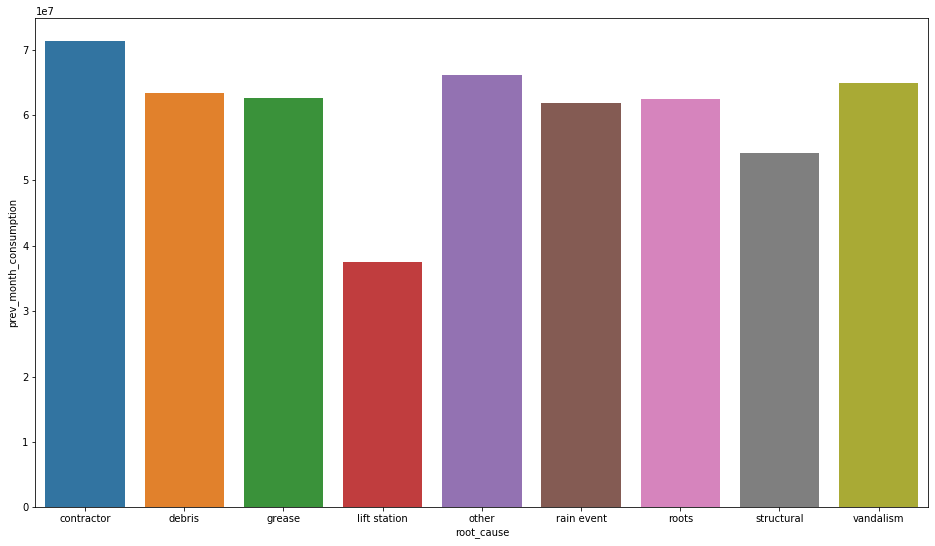

In [21]:
plt.figure(figsize=(16,9))
sns.barplot(x=mean_water.index, y=mean_water.prev_month_consumption)

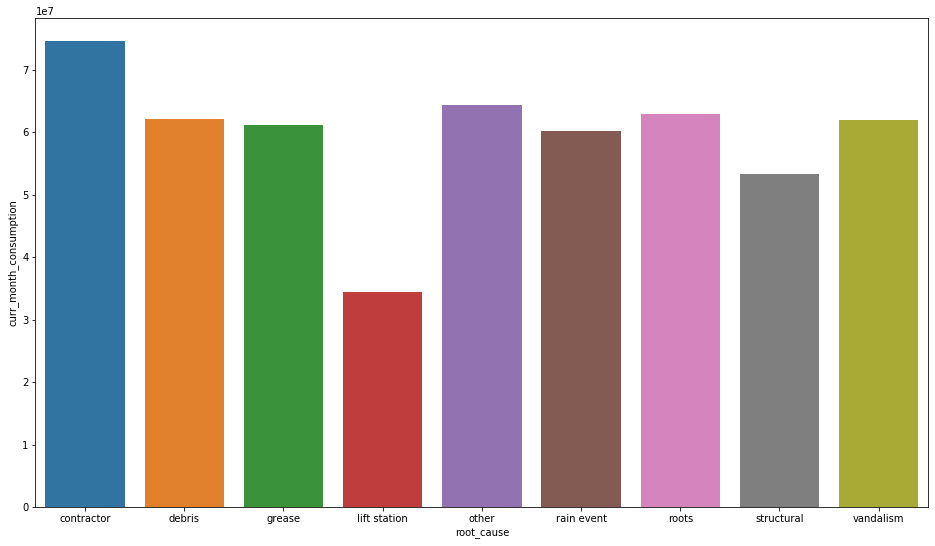

In [22]:
plt.figure(figsize=(16,9))
sns.barplot(x=mean_water.index, y=mean_water.curr_month_consumption)

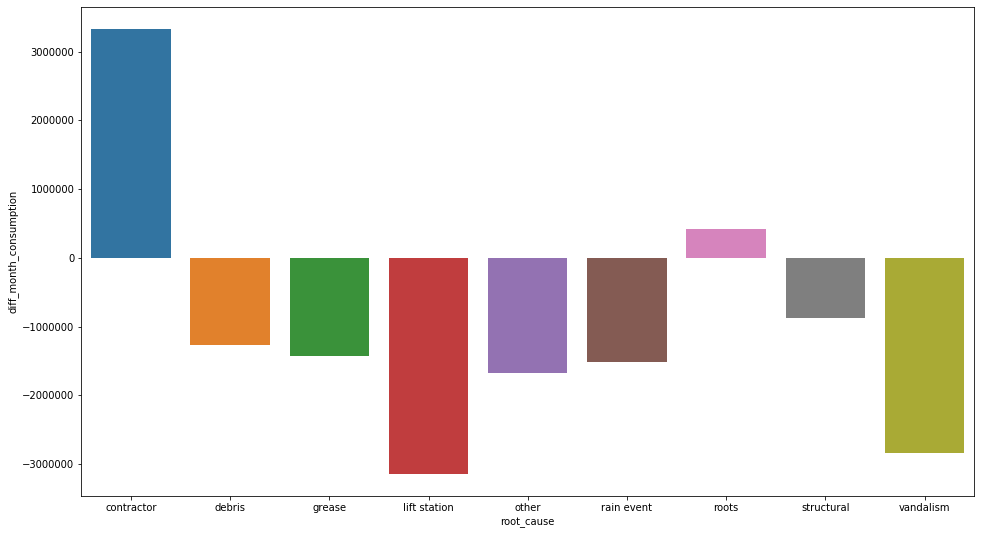

In [23]:
plt.figure(figsize=(16,9))
sns.barplot(x=mean_water.index, y=mean_water.diff_month_consumption)

In [24]:
sso = pd.read_csv('SSO_with_zip_codes.csv')
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code
0,6582,2019-03-10 00:00:00,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,3,2019,11,0.0,8.0,16.550000,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaN,27.0,2019-03-10 13:43:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746
1,6583,2019-03-10 00:00:00,6804,S FLORES ST,80,0.0,2019-03-10 14:25:00,2019-03-10 15:45:00,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,24250,24193,STORMDRAIN,None,3.0,3,2019,11,0.0,8.0,157.000000,PVC,1988.0,NaN,NaN,6804 S FLORES,1,1.0,0,GRAVITY,Sewer Main,NaN,65.0,2019-03-10 15:30:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","6804 S FLORES,SAN ANTONIO,Texas,USA","Flores, West Odessa, Ector County, Texas, Unit...",Texas
2,6581,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.000000,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"(50, 250]","215 Audrey Alene Dr,SAN ANTONIO,Texas,USA","215, Audrey Alene Drive, San Antonio, Bexar Co...",78216
3,6584,2019-03-09 00:00:00,3602,SE MILITARY DR,83,0.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,NaN,SALADO CREEK,92804,92805,EASEMENT,None,3.0,3,2019,10,0.0,8.0,213.910000,PVC,1983.0,NaN,NaN,3602 SE MILITARY DR,1,1.0,0,GRAVITY,Sewer Main,NaN,33.0,2019-03-09 16:10:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","3602 SE MILITARY DR,SAN ANTONIO,Texas,USA","Quality Suites, Southeast Military Drive, Hill...",78223
4,6580,2019-03-06 00:00:00,100,PANSY LN,75,0.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,61141,49543,STREET,None,2.0,3,2019,10,0.0,12.0,291.900000,CP,1952.0,NaN,NaN,100 PANSY LN,2,2.0,2018-12-15 00:00:00,GRAVITY,Sewer Main,NaN,0.0,2019-03-06 09:40:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","100 PANSY LN,SAN ANTONIO,Texas,USA","Pansy Lane, San Antonio, Bexar County, Texas, ...",78209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,371,2009-01-06 00:00:00,2383,LOOP 410 NE,2000,NaN,2009-01-06 12:00:00,2009-01-06 13:00:00,1.000000,Debris/Rock,CLEANED MAIN,APPLIED HTH,SALADO CREEK,46343,59920,DRAINAGE CULVERT,NaN,10.0,1,2009,2,NaN,8.0,400.000000,VCP,1966.0,NaN,NaN,NE LOOP 410 02383,1,0.0,0,GRAVITY,Sewer Main,NaN,NaN,NaN,False,structural,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","NE LOOP 410 02383,SAN ANTONIO,Texas,USA","Northeast Loop 410, San Antonio, Bexar County,...",78220-1930
3179,372,2009-01-05 00:00:00,7407,ELDERBERRY,800,NaN,2009-01-05 14:00:00,2009-01-05 16:00:00,2.000000,Rags,CLEANED MAIN,APPLIED HTH,LEON CREEK,89038,74015,STREET,NaN,7.0,1,2009,2,NaN,8.0,151.877494,VCP,1976.0,NaN,NaN,ELDERBERRY 07407,2,0.0,0,GRAVITY,Sewer Main,NaN,NaN,NaN,False,structural,0.00,0.0,0.0,0.0,NaN,"(250, 1000]","ELDERBERRY 07407,SAN ANTONIO,Texas,USA","Elderberry, Camp Willow, Guadalupe County, Tex...

In [25]:
water

,Record #,Record #.1,Prefix,Service Location,Suffix,ZIP Code,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,0,1,NaN,BUENA VISTA,ST,78207,3740.0,3740.0,3740.0,2992.0,2992.0,2992.0,3740.0,3740.0,3740.0,4489.0,2992.0,2992.0,2992.0,3740.0,2244.0,1496.0,3740.0,2992.0,2992.0,2244.0,2992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,W,TRAVIS,ST,78207,8229.0,7481.0,8229.0,8229.0,7481.0,7481.0,6733.0,7481.0,8229.0,8229.0,5985.0,28428.0,5985.0,7481.0,5985.0,5237.0,5985.0,6733.0,5237.0,6733.0,5237.0,6733.0,5985.0,7481.0,11222.0,9725.0,7481.0,6733.0,7481.0,9725.0,11222.0,9725.0,11222.0,10473.0,10473.0,10473.0
2,2,3,W,HOUSTON,ST,78207,4489.0,3740.0,3740.0,3740.0,3740.0,4489.0,5237.0,4489.0,4489.0,4489.0,4489.0,3740.0,4489.0,5237.0,4489.0,4489.0,4489.0,5237.0,5237.0,5237.0,5237.0,4489.0,4489.0,4489.0,4489.0,5237.0,4489.0,4489.0,4489.0,6733.0,4489.0,5237.0,5237.0,5985.0,4489.0,4489.0
3,3,4,W,HOUSTON,ST,78207,1496.0,2244.0,748.0,1496.0,1496.0,2992.0,6733.0,4489.0,7481.0,0.0,748.0,0.0,0.0,0.0,0.0,0.0,748.0,0.0,0.0,0.0,0.0,11222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,NaN,BUENA VISTA,ST,78207,5237.0,4489.0,3740.0,4489.0,5237.0,4489.0,3740.0,8977.0,2992.0,4489.0,3740.0,3740.0,3740.0,4489.0,4489.0,4489.0,4489.0,4489.0,5985.0,4489.0,4489.0,5985.0,5237.0,2992.0,2244.0,1496.0,748.0,1496.0,748.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706862,706862,708592,NaN,ROBBINS GROVE,NaN,78245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
706863,706863,708593,NaN,DULLES,NaN,78251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4489.0
706864,706864,708594,NaN,HEIGHTS VALLEY,NaN,78109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
706865,706865,708595,NaN,SPRING LIFE,NaN,78249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496.0


In [26]:
full_street_names = []

for index, row in water.iterrows():
    prefix = row.Prefix
    street_name = row['Service Location']
    suffix = row.Suffix
    
    full_name = ''
    
    if type(prefix) != float:
        full_name += prefix
    if type(street_name) != float:
        full_name += ' ' + street_name
    if type(suffix) != float:
        full_name += ' ' + suffix
        
    full_street_names.append(full_name.strip())

water['full_street'] = full_street_names
water

,Record #,Record #.1,Prefix,Service Location,Suffix,ZIP Code,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,full_street
0,0,1,NaN,BUENA VISTA,ST,78207,3740.0,3740.0,3740.0,2992.0,2992.0,2992.0,3740.0,3740.0,3740.0,4489.0,2992.0,2992.0,2992.0,3740.0,2244.0,1496.0,3740.0,2992.0,2992.0,2244.0,2992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUENA VISTA ST
1,1,2,W,TRAVIS,ST,78207,8229.0,7481.0,8229.0,8229.0,7481.0,7481.0,6733.0,7481.0,8229.0,8229.0,5985.0,28428.0,5985.0,7481.0,5985.0,5237.0,5985.0,6733.0,5237.0,6733.0,5237.0,6733.0,5985.0,7481.0,11222.0,9725.0,7481.0,6733.0,7481.0,9725.0,11222.0,9725.0,11222.0,10473.0,10473.0,10473.0,W TRAVIS ST
2,2,3,W,HOUSTON,ST,78207,4489.0,3740.0,3740.0,3740.0,3740.0,4489.0,5237.0,4489.0,4489.0,4489.0,4489.0,3740.0,4489.0,5237.0,4489.0,4489.0,4489.0,5237.0,5237.0,5237.0,5237.0,4489.0,4489.0,4489.0,4489.0,5237.0,4489.0,4489.0,4489.0,6733.0,4489.0,5237.0,5237.0,5985.0,4489.0,4489.0,W HOUSTON ST
3,3,4,W,HOUSTON,ST,78207,1496.0,2244.0,748.0,1496.0,1496.0,2992.0,6733.0,4489.0,7481.0,0.0,748.0,0.0,0.0,0.0,0.0,0.0,748.0,0.0,0.0,0.0,0.0,11222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W HOUSTON ST
4,4,5,NaN,BUENA VISTA,ST,78207,5237.0,4489.0,3740.0,4489.0,5237.0,4489.0,3740.0,8977.0,2992.0,4489.0,3740.0,3740.0,3740.0,4489.0,4489.0,4489.0,4489.0,4489.0,5985.0,4489.0,4489.0,5985.0,5237.0,2992.0,2244.0,1496.0,748.0,1496.0,748.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BUENA VISTA ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706862,706862,708592,NaN,ROBBINS GROVE,NaN,78245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,ROBBINS GROVE
706863,706863,708593,NaN,DULLES,NaN,78251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4489.0,DULLES
706864,706864,708594,NaN,HEIGHTS VALLEY,NaN,78109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,HEIGHTS VALLEY
706865,706865,708595,NaN,SPRING LIFE,NaN,78249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496.0,SPRING LIFE


In [27]:
water = water.groupby('full_street').sum()
water

,Record #,Record #.1,ZIP Code,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
full_street,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2ND ST,2595013,2601775,547547,29176.0,32169.0,23940.0,26184.0,27680.0,32168.0,38902.0,36657.0,30672.0,44886.0,30671.0,39650.0,39650.0,32917.0,34413.0,27679.0,33665.0,35909.0,36657.0,37404.0,43389.0,37405.0,62093.0,38153.0,34413.0,33665.0,23192.0,31420.0,32168.0,42641.0,46381.0,40396.0,34411.0,52366.0,29175.0,26183.0
5TH ST,1347867,1351455,312884,34413.0,37406.0,32916.0,42642.0,37405.0,47879.0,53864.0,53115.0,47130.0,49374.0,36658.0,64337.0,41145.0,54611.0,46382.0,40398.0,73314.0,86780.0,78551.0,56855.0,66581.0,53116.0,59100.0,25435.0,47879.0,35161.0,41146.0,54611.0,46383.0,50871.0,59848.0,54611.0,57604.0,62093.0,55360.0,63589.0
7TH TEE CIR,6696532,6713445,1173315,38152.0,39649.0,37404.0,47129.0,46382.0,49376.0,55360.0,52368.0,66582.0,50124.0,44137.0,42640.0,47879.0,37405.0,46383.0,47130.0,55359.0,68825.0,50122.0,44886.0,47130.0,31421.0,36656.0,35161.0,36656.0,37404.0,31420.0,35161.0,35160.0,32917.0,41145.0,62092.0,60597.0,59848.0,43389.0,44886.0
7TH TEE VISTA,8371856,8393806,2033746,125681.0,118949.0,107728.0,100247.0,133911.0,120446.0,123437.0,120444.0,122688.0,103985.0,117450.0,101741.0,112961.0,92763.0,101742.0,118196.0,125679.0,154110.0,125681.0,142138.0,132415.0,110718.0,87527.0,95755.0,119696.0,88274.0,95008.0,120444.0,102490.0,127175.0,131666.0,196002.0,168325.0,173559.0,115207.0,112964.0
91ST ST,7787816,7808119,1720708,92014.0,89023.0,85282.0,89022.0,101741.0,82290.0,140643.0,118201.0,109970.0,84534.0,92015.0,106977.0,130168.0,78548.0,74809.0,85280.0,82290.0,100245.0,95007.0,101741.0,112215.0,89771.0,82289.0,72565.0,74060.0,86031.0,86031.0,75555.0,74810.0,77052.0,73311.0,122688.0,133161.0,95009.0,69573.0,82290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZORNIA DR,9525992,9550648,2033538,109972.0,115955.0,127926.0,133911.0,184033.0,270813.0,331409.0,338887.0,216201.0,236400.0,160094.0,143635.0,193009.0,127178.0,109970.0,164581.0,288018.0,357590.0,432400.0,259588.0,369560.0,147375.0,131665.0,112215.0,130915.0,117450.0,138398.0,210214.0,136902.0,161589.0,188521.0,366568.0,409959.0,239394.0,181789.0,173558.0
ZULEMA,20437769,20490058,4068324,215452.0,169068.0,190016.0,167572.0,231161.0,204980.0,237897.0,213957.0,207971.0,201239.0,205729.0,187022.0,216201.0,160837.0,177299.0,189267.0,196748.0,219192.0,249116.0,220690.0,205730.0,166075.0,178042.0,201984.0,198994.0,181038.0,171312.0,219192.0,190015.0,229667.0,210215.0,233407.0,290261.0,210963.0,175051.0,187022.0
ZUMA BEACH,21144376,21197919,3046251,15709.0,37406.0,32169.0,29925.0,81542.0,58352.0,98000.0,80046.0,65085.0,48626.0,44886.0,44885.0,83787.0,61341.0,86030.0,54611.0,87526.0,90519.0,96504.0,86778.0,74061.0,65830.0,69572.0,85282.0,86029.0,126427.0,78548.0,80043.0,84533.0,118197.0,93508.0,131664.0,151861.0,84533.0,75555.0,76302.0


In [29]:
sso = sso.merge(water, left_on='spill_st_name', right_on='full_street')
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,Record #,Record #.1,ZIP Code,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,6582,2019-03-10 00:00:00,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,3,2019,11,0.0,8.0,16.55,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaN,27.0,2019-03-10 13:43:00,False,NaN,0.0,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746,2482501,2489143,625856,27680.0,25435.0,21694.0,24688.0,105482.0,45635.0,37404.0,38152.0,26183.0,26931.0,21695.0,26931.0,24687.0,16458.0,15710.0,16458.0,21695.0,22443.0,19451.0,22443.0,20947.0,18703.0,23940.0,22443.0,23191.0,23939.0,21694.0,21695.0,23939.0,20199.0,20947.0,22443.0,27680.0,25436.0,23191.0,27681.0
1,6568,2019-02-18 00:00:00,3023,THOUSAND OAKS DR,1330,0.0,2019-02-18 12:55:00,2019-02-18 15:08:00,2.216667,Grease,NaN,CLEANED LATERAL,SALADO CREEK,334582,NaN,DRAINAGE CULVERT - Over The Edwards Aquifer Tr...,NONE,10.0,2,2019,8,0.0,6.0,0.00,PVC,NaN,NaN,NaN,THOUSAND OAKS DR 3023,1,1.0,0,LATERAL,Sewer Service Line,NaN,115.0,2019-02-18 14:50:00,False,grease,0.0,0.0,0.0,0.0,NaN,"(1000, 5000]","THOUSAND OAKS DR 3023,SAN ANTONIO,Texas,USA","3023, Thousand Oaks Drive, San Antonio, Bexar ...",78247,2482501,2489143,625856,27680.0,25435.0,21694.0,24688.0,105482.0,45635.0,37404.0,38152.0,26183.0,26931.0,21695.0,26931.0,24687.0,16458.0,15710.0,16458.0,21695.0,22443.0,19451.0,22443.0,20947.0,18703.0,23940.0,22443.0,23191.0,23939.0,21694.0,21695.0,23939.0,20199.0,20947.0,22443.0,27680.0,25436.0,23191.0,27681.0
2,6530,2018-12-11 00:00:00,3935,THOUSAND OAKS DR,275,0.0,2018-12-11 10:34:00,2018-12-11 10:45:00,0.183333,Contractor,NaN,REPAIRED MAIN,SALADO CREEK,51214,51213,GROUND,NONE,10.0,12,2018,50,0.0,8.0,402.00,PVC,1984.0,NaN,NaN,THOUSAND OAKS DR 0935,1,1.0,0,GRAVITY,Sewer Main,NaN,0.0,2018-12-11 10:34:00,False,contractor,0.0,0.0,0.0,0.0,NaN,"(250, 1000]","THOUSAND OAKS DR 0935,SAN ANTONIO,Texas,USA","Thousand Oaks Drive, Wetmore, San Antonio, Bex...",78284,2482501,2489143,625856,27680.0,25435.0,21694.0,24688.0,105482.0,45635.0,37404.0,38152.0,26183.0,26931.0,21695.0,26931.0,24687.0,16458.0,15710.0,16458.0,21695.0,22443.0,19451.0,22443.0,20947.0,18703.0,23940.0,22443.0,23191.0,23939.0,21694.0,21695.0,23939.0,20199.0,20947.0,22443.0,27680.0,25436.0,23191.0,27681.0
3,6106,2017-01-29 00:00:00,4411,THOUSAND OAKS DR,805,0.0,2017-01-29 11:19:00,2017-01-29 14:00:00,2.683333,Debris,NaN,CLEANED LATERAL,SALADO CREEK,164310,NaN,STORMDRAIN,NONE,10.0,1,2017,5,0.0,6.0,0.00,PVC,NaN,0.0,0.01,THOUSAND OAKS DR 04411,1,1.0,0,LATERAL,Sewer Service Line,NaN,11.0,2017-01-29 11:30:00,False,debris,0.0,0.0,0.0,0.0,NaN,"(250, 1000]","THOUSAND OAKS DR 04411,SAN ANTONIO,Texas,USA","Thousand Oaks Drive, San Antonio, Bexar County...",78284,2482501,2489143,625856,27680.0,25435.0,21694.0,24688.0,105482.0,45635.0,37404.0,38152.0,26183.0,26931.0,21695.0,26931.0,24687.0,16458.0,15710.0,16458.0,21695.0,22443.0,19451.0,22443.0,20947.0,18703.0,23940.0,22443.0,23191.0,23939.0,21694.0,21695.0,23939.0,20199.0,20947.0,22443.0,27680.0,25436.0,23191.0,27681.0
4,6583,2019-03-10 00:00:00,6804,S FLOR

In [31]:
sso.report_date = pd.to_datetime(sso.report_date)
sso = sso[sso.report_date > '2017-01-31']
sso_month = sso.report_date.dt.month.map("{:02}".format)
sso_year = sso.report_date.dt.year
sso['consumption_code'] = sso_year.astype(str) + sso_month.astype(str)

##################################################################################

this_month_consumption = []

for index, row in sso.iterrows():
    street = row.spill_st_name
    consumption_code = row.consumption_code
    
    this_month_consumption.append(water.loc[street, consumption_code])
    
sso['curr_month_consumption'] = this_month_consumption

##################################################################################

last_month_consumption = []

for index, row in sso.iterrows():
    street = row.spill_st_name
    consumption_code = row.consumption_code
    
    month = row.consumption_code[-2:]
    year = row.consumption_code[:4]
    
    if month == '01':
        int_year = int(year)
        prev_year = int_year - 1
        consumption_code = str(prev_year) + '12'
    else:
        int_month = int(month)
        prev_month = int_month - 1
        if prev_month < 10:
            prev_month = '0' + str(prev_month)
            
        consumption_code = year + str(prev_month)
    
    last_month_consumption.append(water.loc[street, consumption_code])
    
sso['prev_month_consumption'] = last_month_consumption

##################################################################################

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
sso

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,total_gal_binned,country_address,location,zip_code,Record #,Record #.1,ZIP Code,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,consumption_code,curr_month_consumption,prev_month_consumption
0,6582,2019-03-10,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,3,2019,11,0.0,8.0,16.55,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaN,27.0,2019-03-10 13:43:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","3200 THOUSAND OAKS DR,SAN ANTONIO,Texas,USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...",78746,2482501,2489143,625856,27680.0,25435.0,21694.0,24688.0,105482.0,45635.0,37404.0,38152.0,26183.0,26931.0,21695.0,26931.0,24687.0,16458.0,15710.0,16458.0,21695.0,22443.0,19451.0,22443.0,20947.0,18703.0,23940.0,22443.0,23191.0,23939.0,21694.0,21695.0,23939.0,20199.0,20947.0,22443.0,27680.0,25436.0,23191.0,27681.0,201903,21694.0,23939.0
1,6568,2019-02-18,3023,THOUSAND OAKS DR,1330,0.0,2019-02-18 12:55:00,2019-02-18 15:08:00,2.216667,Grease,NaN,CLEANED LATERAL,SALADO CREEK,334582,NaN,DRAINAGE CULVERT - Over The Edwards Aquifer Tr...,NONE,10.0,2,2019,8,0.0,6.0,0.00,PVC,NaN,NaN,NaN,THOUSAND OAKS DR 3023,1,1.0,0,LATERAL,Sewer Service Line,NaN,115.0,2019-02-18 14:50:00,False,grease,0.00,0.0,0.0,0.0,NaN,"(1000, 5000]","THOUSAND OAKS DR 3023,SAN ANTONIO,Texas,USA","3023, Thousand Oaks Drive, San Antonio, Bexar ...",78247,2482501,2489143,625856,27680.0,25435.0,21694.0,24688.0,105482.0,45635.0,37404.0,38152.0,26183.0,26931.0,21695.0,26931.0,24687.0,16458.0,15710.0,16458.0,21695.0,22443.0,19451.0,22443.0,20947.0,18703.0,23940.0,22443.0,23191.0,23939.0,21694.0,21695.0,23939.0,20199.0,20947.0,22443.0,27680.0,25436.0,23191.0,27681.0,201902,23939.0,23191.0
2,6530,2018-12-11,3935,THOUSAND OAKS DR,275,0.0,2018-12-11 10:34:00,2018-12-11 10:45:00,0.183333,Contractor,NaN,REPAIRED MAIN,SALADO CREEK,51214,51213,GROUND,NONE,10.0,12,2018,50,0.0,8.0,402.00,PVC,1984.0,NaN,NaN,THOUSAND OAKS DR 0935,1,1.0,0,GRAVITY,Sewer Main,NaN,0.0,2018-12-11 10:34:00,False,contractor,0.00,0.0,0.0,0.0,NaN,"(250, 1000]","THOUSAND OAKS DR 0935,SAN ANTONIO,Texas,USA","Thousand Oaks Drive, Wetmore, San Antonio, Bex...",78284,2482501,2489143,625856,27680.0,25435.0,21694.0,24688.0,105482.0,45635.0,37404.0,38152.0,26183.0,26931.0,21695.0,26931.0,24687.0,16458.0,15710.0,16458.0,21695.0,22443.0,19451.0,22443.0,20947.0,18703.0,23940.0,22443.0,23191.0,23939.0,21694.0,21695.0,23939.0,20199.0,20947.0,22443.0,27680.0,25436.0,23191.0,27681.0,201812,22443.0,23940.0
4,6583,2019-03-10,6804,S FLORES ST,80,0.0,2019-03-10 14:25:00,2019-03-10 15:45:00,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,24250,24193,STORMDRAIN,None,3.0,3,2019,11,0.0,8.0,157.00,PVC,1988.0,NaN,NaN,6804 S FLORES,1,1.0,0,GRAVITY,Sewer Main,NaN,65.0,2019-03-10 15:30:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"(50, 250]","6804 S FLORES,SAN ANTONIO,Texas,USA","Flores, West Odessa, Ector County, Texas, Unit...",Texas,41398968,41505957,7664587,278288.0,288012.0,285021.0,301480.0,324669.0,331401.0,377034.0,306714.0,259587.0,254349.0,334394.0,329159.0,341131.0,271554.0,285020.0,268562.0,258089.0,332896.0,351600.0,351601.0,373297.0,230413.0,246121.0,235642.0,229662.

In [33]:
df = sso[['root_cause', 'prev_month_consumption', 'curr_month_consumption']].dropna()
df['diff_month_consumption'] = df.curr_month_consumption - df.prev_month_consumption
mean_water = df.groupby('root_cause').mean()

In [34]:
mean_water

,prev_month_consumption,curr_month_consumption,diff_month_consumption
root_cause,,,
contractor,313897.239130,332790.652174,18893.413043
debris,426575.285714,428748.000000,2172.714286
grease,397446.506329,394139.873418,-3306.632911
lift station,349774.666667,322645.333333,-27129.333333
other,254671.142857,275300.000000,20628.857143
rain event,334915.969231,333385.553846,-1530.415385
roots,397236.500000,411450.500000,14214.000000
structural,454286.200000,455908.400000,1622.200000
vandalism,318899.857143,315801.000000,-3098.857143


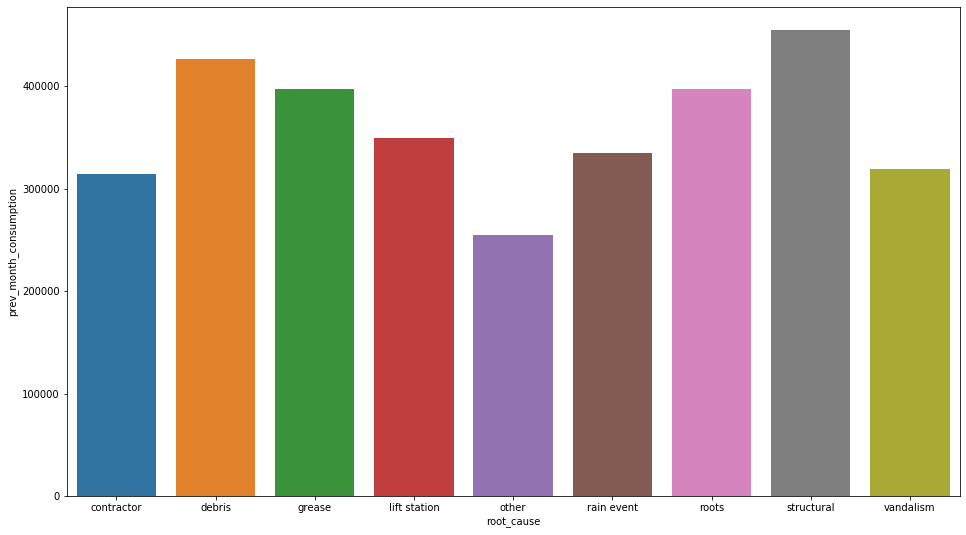

In [35]:
plt.figure(figsize=(16,9))
sns.barplot(x=mean_water.index, y=mean_water.prev_month_consumption)

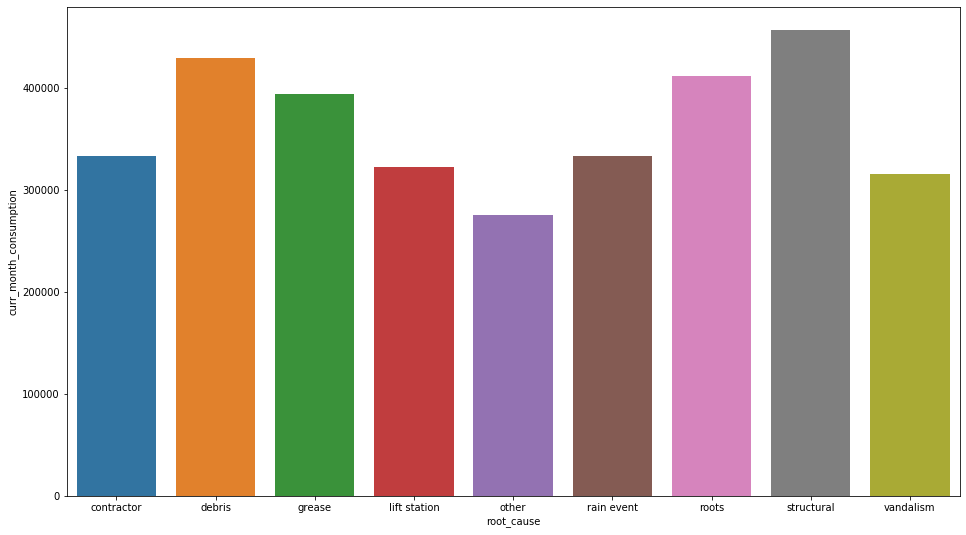

In [36]:
plt.figure(figsize=(16,9))
sns.barplot(x=mean_water.index, y=mean_water.curr_month_consumption)

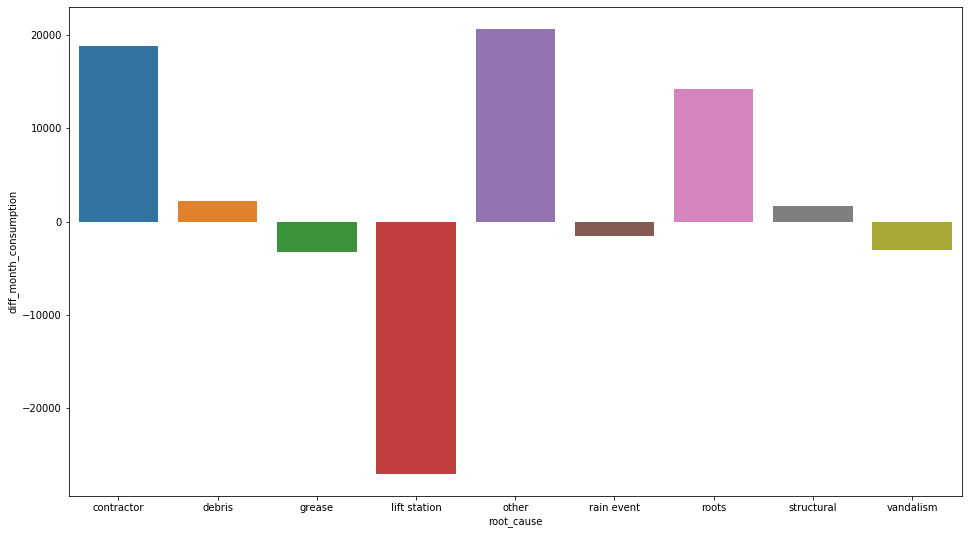

In [37]:
plt.figure(figsize=(16,9))
sns.barplot(x=mean_water.index, y=mean_water.diff_month_consumption)

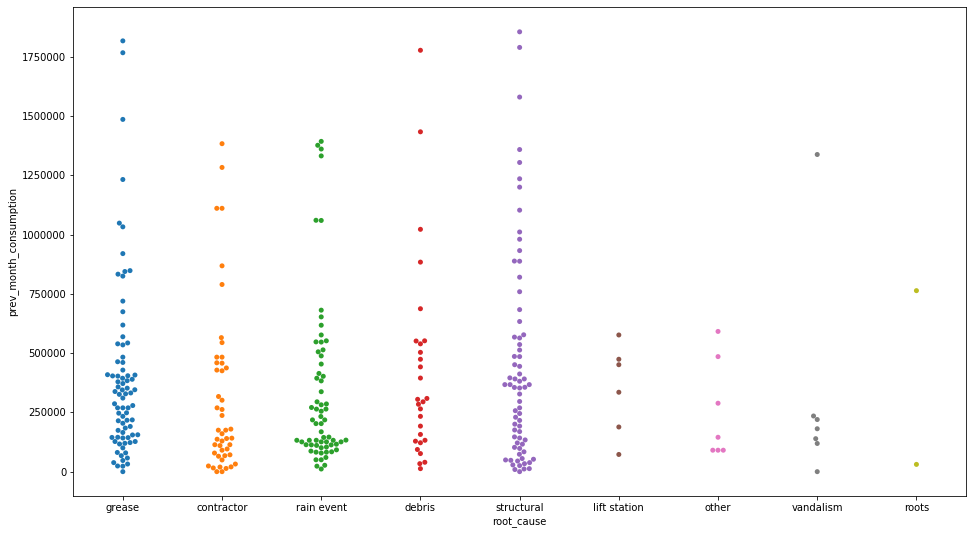

In [38]:
plt.figure(figsize=(16,9))
sns.swarmplot(x=df.root_cause, y=df.prev_month_consumption)

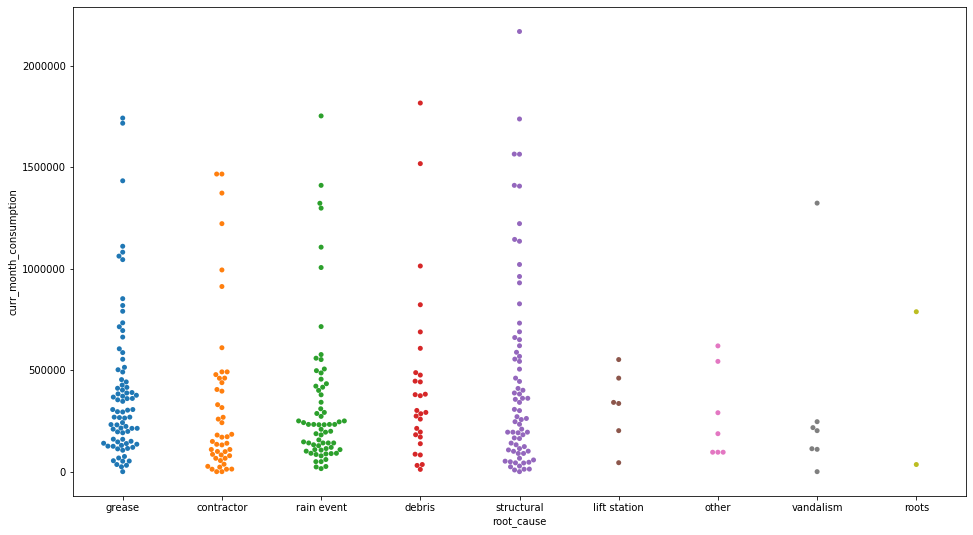

In [40]:
plt.figure(figsize=(16,9))
sns.swarmplot(x=df.root_cause, y=df.curr_month_consumption)